In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [5]:
train_score = reg.score(X_train, y_train)
print(f'R2 score (train): {train_score:.4f}')

test_score = reg.score(X_test, y_test)
print(f'R2 score (test): {test_score:.4f}')

R2 score (train): 1.0000
R2 score (test): 0.5924


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(5, 16),
    'min_samples_leaf': np.arange(2, 11),
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 13, 'min_samples_leaf': 10}


In [7]:
train_score = grid.score(X_train, y_train)
print(f'R2 score (train): {train_score:.4f}')

test_score = grid.score(X_test, y_test)
print(f'R2 score (test): {test_score:.4f}')

R2 score (train): 0.8485
R2 score (test): 0.7188


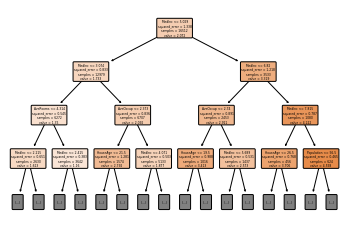

In [8]:
from sklearn import tree

tree.plot_tree(reg, max_depth=3, feature_names=feature_names, 
               filled=True, rounded=True, fontsize=3)
plt.savefig('figures/california_tree.pdf')